In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [57]:
df = pd.read_csv(r'C:\Users\NITRO 5\Downloads\linear-regression\review_shopping.csv', 
                 sep='\t', names=['text', 'sentiment'], header=None)
df

,text,sentiment
0,เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า,neg
1,สินค้าด้อยคุณภาพ,neg
2,สินค้าหมดทำไมไม่แจ้งขึ้นว่าหมดอะ.กดใส่ตะกร้าไป...,neg
3,อย่าทำแบบนี้กับใครอีกนะค่ะแย่มากค่ะ,neg
4,คือเเบบผิดหวังมาก เเย่ที่สุดได้ของมาฝาเเตก เเต...,neg
...,...,...
123,สินค้ามีตำหนิ แย่มากๆ ไม่ไหวๆเลย ถ้ามีตำหนิก็บ...,neg
124,เปราะบางมากความแข็งแรงน้อย มันง่ายต่อการแตกหัก,neg
125,ขนส่งก็ช้าสินค้ามีตำหนิแพ็คสินค้าไม่ดีมีรอยบุบ,neg
126,สินค้าเหมือนของปลอม เนื่อครีมเหมือนซอง 10 บาท ...,neg


<AxesSubplot:>

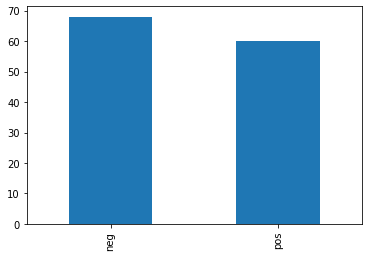

In [58]:
df['sentiment'].value_counts().plot.bar() #ดูว่ามีข้อความที่เป็นแง่บวกและแง่ลบ อย่างละกี่ข้อความ

In [59]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())
thai_stopwords

['สั้นๆ',
 'แต่',
 'เช่นนั้นเอง',
 'ฝ่าย',
 'มุ่ง',
 'อัน',
 'พวกโน้น',
 'บางครา',
 'เช่นไร',
 'เชื่อถือ',
 'เป็นแต่',
 'เรียก',
 'จัดตั้ง',
 'กล่าวคือ',
 'เพื่อที่จะ',
 'จน',
 'ยิ่งนัก',
 'เรียบ',
 'แค่นั้น',
 'ด้วยเหมือนกัน',
 'ดั่ง',
 'นี้แหล่',
 'ถึงเมื่อ',
 'ใคร่',
 'สิ่งนั้น',
 'เช่นดังเก่า',
 'พวกเขา',
 'จริง',
 'อย่างเดียว',
 'ยัง',
 'ทีไร',
 'หรือไม่',
 'ครบ',
 'จนแม้',
 'พวกคุณ',
 'เท่านั้น',
 'เมื่อก่อน',
 'ยังคง',
 'เปิดเผย',
 'พอจะ',
 'ผ่านๆ',
 'ถึงแม้ว่า',
 'แต่เพียง',
 'ยิ่งเมื่อ',
 'เป็นเพียง',
 'พวกเธอ',
 'ตนฯ',
 'จรดกับ',
 'ไม่เป็นไร',
 'แรก',
 'เมื่อเช้า',
 'ชาว',
 'เผื่อที่',
 'ซะจนกระทั่ง',
 'ครานั้น',
 'อาจเป็น',
 'เช่นดังก่อน',
 'ปิด',
 'คราหนึ่ง',
 'ที',
 'หรือไร',
 'ตลอดจน',
 'แก่',
 'ช่วงก่อน',
 'พวกนี้',
 'ตรง',
 'ล่าสุด',
 'นำพา',
 'จวบกับ',
 'ยก',
 'ร่วมด้วย',
 'ที่ซึ่ง',
 'ทีละ',
 'จัด',
 'เสร็จสิ้น',
 'ถึง',
 'มา',
 'ใหญ่ๆ',
 'ล้วนจน',
 'เพียงใด',
 'เกี่ยวข้อง',
 'กันและกัน',
 'ทำๆ',
 'นี่แน่ะ',
 '\ufeffๆ',
 'เขา',
 'มิฉะนั้น',
 'พร้อมเพียง',
 'ภายภาคหน้า

In [60]:
from pythainlp import word_tokenize
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final
df['text_tokens'] = df['text'].apply(text_process)
df

,text,sentiment,text_tokens
0,เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า,neg,เกลียด ชอบ หลอก ให้ สั่งซื้อ ที่ไหนได้ ไม่ มี ...
1,สินค้าด้อยคุณภาพ,neg,สินค้า ด้อย คุณภาพ
2,สินค้าหมดทำไมไม่แจ้งขึ้นว่าหมดอะ.กดใส่ตะกร้าไป...,neg,สินค้า หมด ทำไม ไม่ แจ้ง ขึ้น ว่า หมด อะ กด ใส...
3,อย่าทำแบบนี้กับใครอีกนะค่ะแย่มากค่ะ,neg,อย่า ทำ แบบนี้ กับ ใคร อีก นะ ค่ะ แย่มาก ค่ะ
4,คือเเบบผิดหวังมาก เเย่ที่สุดได้ของมาฝาเเตก เเต...,neg,คือ เเบบ ผิดหวัง มาก เเย่ ที่สุด ได้ ของ มา ฝา...
...,...,...,...
123,สินค้ามีตำหนิ แย่มากๆ ไม่ไหวๆเลย ถ้ามีตำหนิก็บ...,neg,สินค้า มีตำหนิ แย่มาก ไม่ ไหว เลย ถ้า มีตำหนิ ...
124,เปราะบางมากความแข็งแรงน้อย มันง่ายต่อการแตกหัก,neg,เปราะบาง มาก ความแข็งแรง น้อย มัน ง่าย ต่อ การ...
125,ขนส่งก็ช้าสินค้ามีตำหนิแพ็คสินค้าไม่ดีมีรอยบุบ,neg,ขนส่ง ก็ ช้า สินค้า มีตำหนิ แพ็ค สินค้า ไม่ ดี...
126,สินค้าเหมือนของปลอม เนื่อครีมเหมือนซอง 10 บาท ...,neg,สินค้า เหมือน ของปลอม เนื่อ ครีม เหมือน ซอง 10...


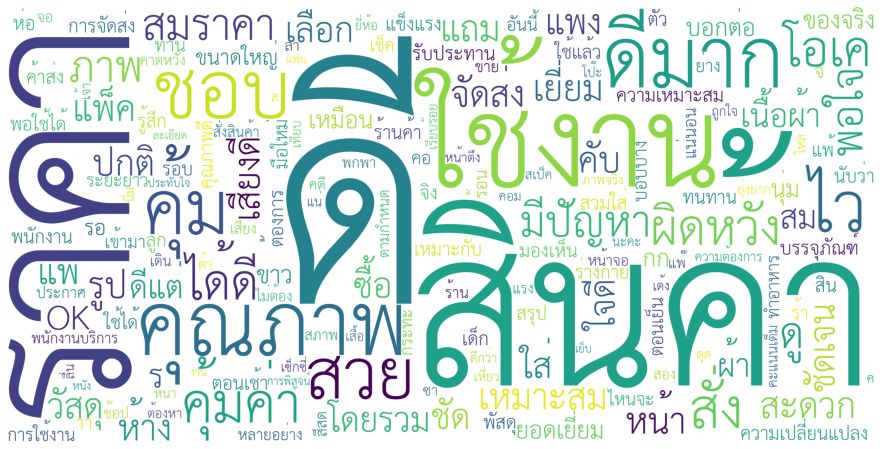

In [61]:
from wordcloud import WordCloud
df_pos = df[df['sentiment'] == 'pos']
pos_word_all = " ".join(text for text in df_pos['text_tokens'])
reg = r"[ก-๙a-zA-Z']+"
fp = r'C:\Users\NITRO 5\nlp\THSarabunNew.ttf'

wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white',
                      max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

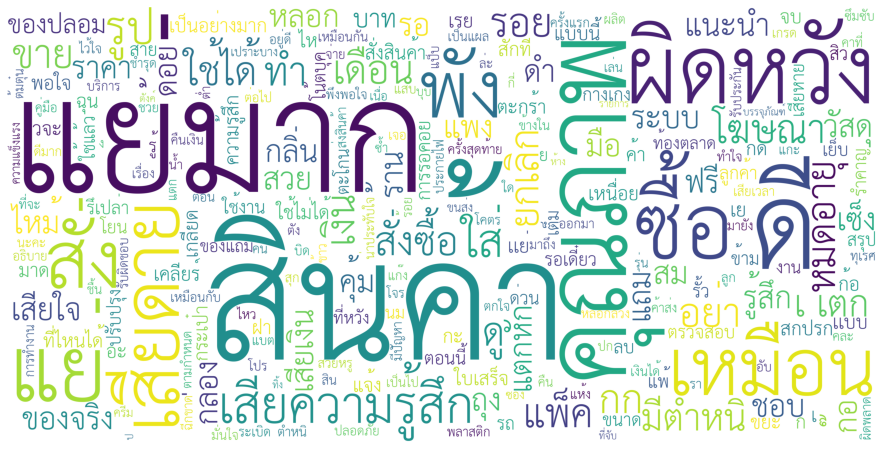

In [43]:
from wordcloud import WordCloud
df_pos = df[df['sentiment'] == 'neg']
neg_word_all = " ".join(text for text in df_pos['text_tokens'])
reg = r"[ก-๙a-zA-Z']+"
fp = r'C:\Users\NITRO 5\nlp\THSarabunNew.ttf'

wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white',
                      max_words=2000, height = 2000, width=4000, font_path=fp, 
                      regexp=reg).generate(neg_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
X = df[['text_tokens']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
cvec.vocabulary_

{'แย่มาก': 337,
 'บิด': 146,
 'น้ำ': 139,
 'ไม่': 367,
 'แห้ง': 341,
 'เสียดาย': 304,
 'ตัง': 99,
 'มาก': 171,
 'อย่า': 257,
 'ทำ': 117,
 'แบบนี้': 329,
 'กับ': 8,
 'ใคร': 349,
 'อีก': 265,
 'นะ': 130,
 'ค่ะ': 59,
 'รับ': 193,
 'ของ': 24,
 'ไว': 370,
 'พนักงาน': 157,
 'ส่ง': 240,
 'ดีมาก': 87,
 'คุณภาพ': 54,
 'คุ้ม': 55,
 'ราคา': 197,
 'ซื้อ': 83,
 'แล้ว': 340,
 'ผิดหวัง': 153,
 'สินค้า': 234,
 'มี': 173,
 'สิน': 233,
 'ค้าส่ง': 61,
 'มา': 170,
 'แตกหัก': 322,
 'ยัง': 179,
 'ได้': 362,
 'ประกอบ': 150,
 'เลย': 299,
 'เสียความรู้สึก': 302,
 'วัสดุ': 215,
 'เหมือน': 312,
 'หมดอายุ': 247,
 'ของปลอม': 26,
 'เนื่อ': 286,
 'ครีม': 40,
 'ซอง': 80,
 '10': 0,
 'บาท': 145,
 'บรรจุภัณฑ์': 140,
 'ก๊อ': 21,
 'ป': 148,
 'ของจริง': 25,
 'ใน': 357,
 'ห้าง': 254,
 'ตังค์': 100,
 'ทิ้ง': 122,
 'สวย': 223,
 'ใช้งาน': 353,
 'ง่าย': 63,
 'ที่': 123,
 'สำคัญ': 232,
 'เร็ว': 298,
 'คะ': 45,
 'แพ๊': 335,
 'คดี': 36,
 'สภาพ': 219,
 'ดี': 85,
 'ถูก': 112,
 'ไม่ต้อง': 369,
 'ไป': 366,
 'เดิน': 278,
 'ช๊อป': 79,
 

In [46]:
train_bow = cvec.transform(X_train['text_tokens'])
pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names(), index=X_train['text_tokens'])

C:\Users\NITRO 5\anaconda3\envs\nlp-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,OK,กก,กด,กระทะ,กลิ่น,กล่อง,กว่า,กับ,กางเกง,...,ไม่ค่อย,ไม่ต้อง,ไว,ไว้,ไว้ใจ,ไหนจะ,ไหม้,ไหล,ไหว,☺
text_tokens,,,,,,,,,,,,,,,,,,,,,
แย่มาก บิด น้ำ ไม่ แห้ง เสียดาย ตัง มาก,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
อย่า ทำ แบบนี้ กับ ใคร อีก นะ ค่ะ แย่มาก ค่ะ,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
รับ ของ ไว พนักงาน ส่ง ของ ดีมาก คุณภาพ คุ้ม ราคา,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
ซื้อ แล้ว ผิดหวัง สินค้า ไม่ มี คุณภาพ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
สิน ค้าส่ง มา แตกหัก ยัง ไม่ ได้ ประกอบ เลย เสียความรู้สึก,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
แย่มาก เสียดาย เงิน,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
สินค้า ใช้ ดี สีสด ใช้ จนถึง ทุกวันนี้,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
แพ็ค ของ ไม่ ดีมาก เลย ครับ ข้างใน กล่อง ฉีกขาด ไม่ สวย เลย,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bow, y_train)

LogisticRegression()

In [48]:
from sklearn.metrics import confusion_matrix,classification_report
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr.predict(test_bow)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

         neg       0.96      0.92      0.94        24
         pos       0.88      0.93      0.90        15

    accuracy                           0.92        39
   macro avg       0.92      0.93      0.92        39
weighted avg       0.93      0.92      0.92        39



In [49]:
my_text = 'ตรงปกส่งไวครับ'
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
my_predictions

array(['pos'], dtype=object)

In [51]:
my_text = 'ไม่ตรงปกส่งช้าครับ'
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
my_predictions

array(['neg'], dtype=object)

In [64]:
my_text = ''
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
my_predictions

array(['pos'], dtype=object)